# Bibliotecas

In [1303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.svm import SVC

import xgboost as xgb 

import shap

# Dataset

In [1304]:
#Carregar o dataset Titanic
df_train = pd.read_csv(r'C:\Python\Titanic\train.csv')

In [1305]:
# Exibir as 5 primeiras linhas do dataset
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [1306]:
# Exibir informações gerais sobre o DataFrame
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [1307]:
# Exibir estatísticas descritivas para as colunas numéricas
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1308]:
# Contar valores ausentes por coluna
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [1309]:
# Quantidade de sobreviventes
print("Quantidade de sobreviventes:", df_train['Survived'].value_counts(normalize=True))


Quantidade de sobreviventes: Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [1310]:
# Exibir a quantidade de valores ausentes por coluna
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Tratamento dos Dados

In [1311]:
# Excluir a coluna 'Cabin'
df_train.drop('Cabin', axis=1, inplace=True)

# Exibir a novo dataset
print(df_train.head())
print(df_train.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
<class 'pandas.core.frame.DataFrame'>


In [1312]:
# Resolvendo o problema de valores ausentes na coluna 'Embarked'
# 1. Calcular a moda da coluna 'Embarked'
moda_embarked = df_train['Embarked'].mode()[0] # [0] para pegar o primeiro valor se houver múltiplas modas
print(f"A moda da coluna 'Embarked' é: {moda_embarked}")

# 2. Preencher os valores ausentes (NaNs) na coluna 'Embarked' com a moda calculada
df_train['Embarked'].fillna(moda_embarked, inplace=True)

# 3. Verificar se os valores ausentes foram preenchidos (boa prática)
print("\nContagem de valores ausentes após preencher 'Embarked':")
print(df_train.isnull().sum())

A moda da coluna 'Embarked' é: S

Contagem de valores ausentes após preencher 'Embarked':
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


C:\Users\NVME\AppData\Local\Temp\ipykernel_8948\2126310383.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(moda_embarked, inplace=True)


In [1313]:
# Calcular a mediana da coluna 'Fare'
mediana_fare = df_train['Fare'].median()
print(f"A mediana da coluna 'Fare' é: {mediana_fare}")

A mediana da coluna 'Fare' é: 14.4542


In [1314]:
# 4. Agora sim, calcular a média da coluna 'Age'
media_idade = df_train['Age'].mean()
print(f"A média da coluna 'Age' é: {media_idade:.2f}")

# 5. Calcular a mediana da coluna 'Age'
mediana_idade = df_train['Age'].median()
print(f"A mediana da coluna 'Age' é: {mediana_idade:.2f}")


A média da coluna 'Age' é: 29.70
A mediana da coluna 'Age' é: 28.00


In [1315]:
# Resolvendo o problema de valores ausentes na coluna 'Age'
# 1. Preencher os valores ausentes (NaNs) na coluna 'Age' com a moda calculada
df_train['Age'].fillna(mediana_idade, inplace=True)

# 2. Verificar se os valores ausentes foram preenchidos (boa prática)
print("\nContagem de valores ausentes após preencher 'Age':")
print(df_train.isnull().sum())


Contagem de valores ausentes após preencher 'Age':
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\NVME\AppData\Local\Temp\ipykernel_8948\3576810113.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(mediana_idade, inplace=True)


# Insights

## Insight Sobre a Relação entre Sexo e Sobreviventes

In [1316]:
# Calcular a contagem de sobreviventes e não-sobreviventes para cada sexo
print("Contagem de sobreviventes (1) e não-sobreviventes (0) por Sexo:")
print(df_train.groupby('Sex')['Survived'].value_counts())

Contagem de sobreviventes (1) e não-sobreviventes (0) por Sexo:
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


In [1317]:
# Para ter uma visão mais completa, vamos também calcular a proporção
print("\nProporção de sobreviventes (1) e não-sobreviventes (0) por Sexo:")
print(df_train.groupby('Sex')['Survived'].value_counts(normalize=True))


Proporção de sobreviventes (1) e não-sobreviventes (0) por Sexo:
Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


In [1318]:
# Vamos calcular a proporção de mulheres e homens DENTRO do grupo de sobreviventes

# Filtrar o DataFrame para incluir apenas os sobreviventes
survivors_df = df_train[df_train['Survived'] == 1]

# Calcular a proporção de sexo dentro do grupo de sobreviventes
print("Proporção de Mulheres e Homens entre os Sobreviventes:")
print(survivors_df['Sex'].value_counts(normalize=True))

Proporção de Mulheres e Homens entre os Sobreviventes:
Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64


In [1319]:
# Vamos calcular a proporção de mulheres e homens DENTRO do grupo de não-sobreviventes

# Filtrar o DataFrame para incluir apenas os não-sobreviventes
survivors_df = df_train[df_train['Survived'] == 0]

# Calcular a proporção de sexo dentro do grupo de não-sobreviventes
print("Proporção de Mulheres e Homens entre os não-Sobreviventes:")
print(survivors_df['Sex'].value_counts(normalize=True))

Proporção de Mulheres e Homens entre os não-Sobreviventes:
Sex
male      0.852459
female    0.147541
Name: proportion, dtype: float64


## Insight Sobre a Relação entre Classe e Sobreviventes

In [1320]:
# Calcular a contagem de sobreviventes e não-sobreviventes para cada classe
print("Contagem de sobreviventes (1) e não-sobreviventes (0) por Classe:")
print(df_train.groupby('Pclass')['Survived'].value_counts())

Contagem de sobreviventes (1) e não-sobreviventes (0) por Classe:
Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


In [1321]:
# Para ter uma visão mais completa, vamos também calcular a proporção
print("\nProporção de sobreviventes (1) e não-sobreviventes (0) por Classe:")
print(df_train.groupby('Pclass')['Survived'].value_counts(normalize=True))


Proporção de sobreviventes (1) e não-sobreviventes (0) por Classe:
Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


In [1322]:
# Vamos calcular a proporção das 3 classes DENTRO do grupo de sobreviventes

# Filtrar o DataFrame para incluir apenas os sobreviventes
survivors_df = df_train[df_train['Survived'] == 1]

# Calcular a proporção de classe dentro do grupo de sobreviventes
print("Proporção das 3 classes entre os Sobreviventes:")
print(survivors_df['Pclass'].value_counts(normalize=True))

Proporção das 3 classes entre os Sobreviventes:
Pclass
1    0.397661
3    0.347953
2    0.254386
Name: proportion, dtype: float64


In [1323]:
# Vamos calcular a proporção das 3 classes DENTRO do grupo de não-sobreviventes

# Filtrar o DataFrame para incluir apenas os não-sobreviventes
survivors_df = df_train[df_train['Survived'] == 0]

# Calcular a proporção de classe dentro do grupo de não-sobreviventes
print("Proporção das 3 classes entre os não-Sobreviventes:")
print(survivors_df['Pclass'].value_counts(normalize=True))

Proporção das 3 classes entre os não-Sobreviventes:
Pclass
3    0.677596
2    0.176685
1    0.145719
Name: proportion, dtype: float64


## Insight Sobre a Relação entre Idade e Sobreviventes

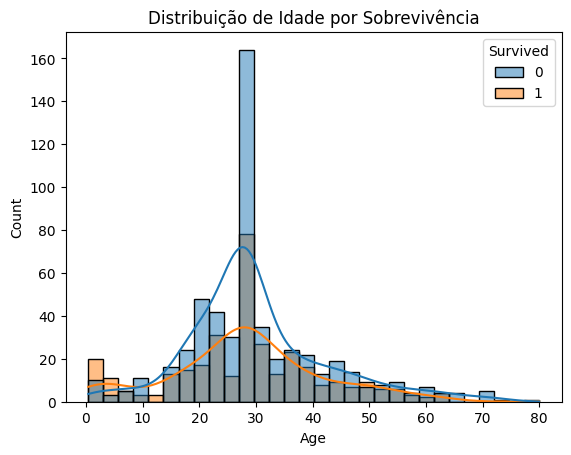

In [1324]:
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True)
plt.title('Distribuição de Idade por Sobrevivência')
plt.show()

## Insight Sobre a Relação entre Tarifa e Sobreviventes

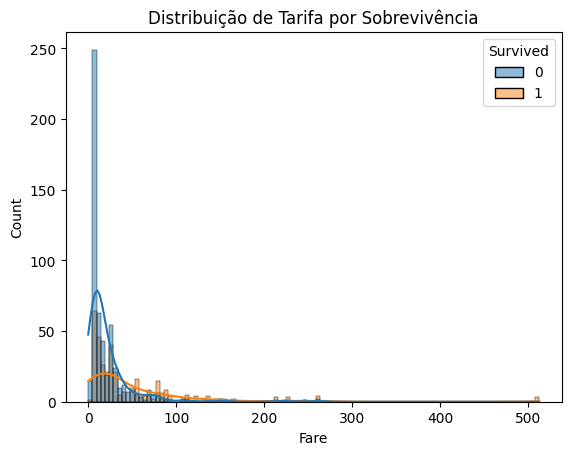

In [1325]:
sns.histplot(data=df_train, x='Fare', hue='Survived', kde=True)
plt.title('Distribuição de Tarifa por Sobrevivência')
plt.show()

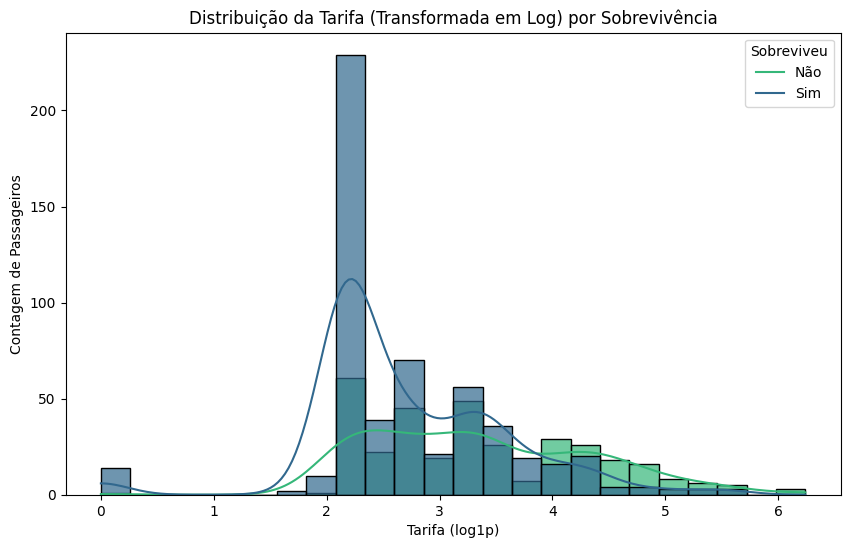

In [1326]:
# Aplicar a transformação logarítmica à coluna 'Fare'
# Criaremos uma nova coluna para armazenar a tarifa transformada, para manter a original.
df_train['Fare_log'] = np.log1p(df_train['Fare'])

# Gerar o histograma/KDE da nova coluna 'Fare_log' vs. 'Survived'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Fare_log', hue='Survived', kde=True, palette='viridis', alpha=0.7)
plt.title('Distribuição da Tarifa (Transformada em Log) por Sobrevivência')
plt.xlabel('Tarifa (log1p)')
plt.ylabel('Contagem de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

## Insight Sobre a Relação entre tamanho da familia e Sobreviventes

In [1327]:
# Criando a coluna 'FamilySize'
df_train['FamilySize'] = df_train['SibSp'] + df_train["Parch"] + 1

In [1328]:
# Calcular a contagem de sobreviventes e não-sobreviventes para cada tamanho de família
print("Contagem de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:")
print(df_train.groupby('FamilySize')['Survived'].value_counts())

Contagem de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:
FamilySize  Survived
1           0           374
            1           163
2           1            89
            0            72
3           1            59
            0            43
4           1            21
            0             8
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
Name: count, dtype: int64


In [1329]:
# Para ter uma visão mais completa, vamos também calcular a proporção
print("\nProporção de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:")
print(df_train.groupby('FamilySize')['Survived'].value_counts(normalize=True))


Proporção de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:
FamilySize  Survived
1           0           0.696462
            1           0.303538
2           1           0.552795
            0           0.447205
3           1           0.578431
            0           0.421569
4           1           0.724138
            0           0.275862
5           0           0.800000
            1           0.200000
6           0           0.863636
            1           0.136364
7           0           0.666667
            1           0.333333
8           0           1.000000
11          0           1.000000
Name: proportion, dtype: float64


In [1330]:
# Vamos calcular a proporção de tamanho de família DENTRO do grupo de sobreviventes

# Filtrar o DataFrame para incluir apenas os sobreviventes
survivors_df = df_train[df_train['Survived'] == 1]

# Calcular a proporção de tamanho de família dentro do grupo de sobreviventes
print("Proporção de tamanho de família entre os Sobreviventes:")
print(survivors_df['FamilySize'].value_counts(normalize=True))

Proporção de tamanho de família entre os Sobreviventes:
FamilySize
1    0.476608
2    0.260234
3    0.172515
4    0.061404
7    0.011696
6    0.008772
5    0.008772
Name: proportion, dtype: float64


In [1331]:
# Vamos calcular a proporção de tamanho de família DENTRO do grupo de não-sobreviventes

# Filtrar o DataFrame para incluir apenas os não-sobreviventes
survivors_df = df_train[df_train['Survived'] == 0]

# Calcular a proporção de tamanho de família dentro do grupo de não-sobreviventes
print("Proporção de tamanho de família entre os não-Sobreviventes:")
print(survivors_df['FamilySize'].value_counts(normalize=True))

Proporção de tamanho de família entre os não-Sobreviventes:
FamilySize
1     0.681239
2     0.131148
3     0.078324
6     0.034608
5     0.021858
7     0.014572
4     0.014572
11    0.012750
8     0.010929
Name: proportion, dtype: float64


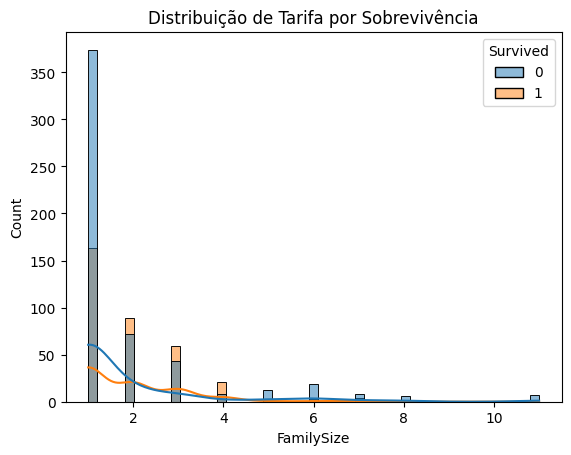

In [1332]:
# Gerar o histograma/KDE da coluna 'FamilySize' vs. 'Survived'
sns.histplot(data=df_train, x='FamilySize', hue='Survived', kde=True)
plt.title('Distribuição de Tarifa por Sobrevivência')
plt.show()

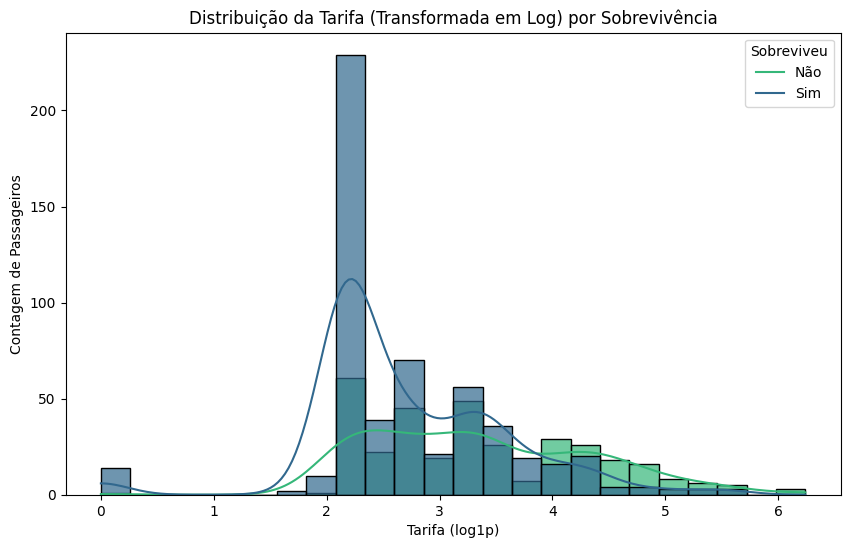

In [1333]:
# Aplicar a transformação logarítmica à coluna 'FamilySize'
# Criaremos uma nova coluna para armazenar a tarifa transformada, para manter a original.
df_train['FamilySize_log'] = np.log1p(df_train['FamilySize'])

# Gerar o histograma/KDE da nova coluna 'FamilySize_log' vs. 'Survived'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Fare_log', hue='Survived', kde=True, palette='viridis', alpha=0.7)
plt.title('Distribuição da Tarifa (Transformada em Log) por Sobrevivência')
plt.xlabel('Tarifa (log1p)')
plt.ylabel('Contagem de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

# Preparar Os Dados Para Modelagem

In [1334]:
# Criando a coluna 'FamilySize_log'
df_train['FamilySize_log'] = np.log1p(df_train['FamilySize'])

In [1335]:
# Aplicar One-Hot Encoding na coluna "Sex"
df_train_encoded = pd.get_dummies(
    df_train, 
    prefix=None, 
    prefix_sep='_', 
    dummy_na=False, 
    columns=['Sex'], 
    sparse=False, 
    drop_first=False, 
    dtype=None)

In [1336]:
# Aplicar One-Hot Encoding na coluna "Embarked"
df_train_encoded = pd.get_dummies(
    df_train_encoded, 
    prefix=None, 
    prefix_sep='_', 
    dummy_na=False, 
    columns=['Embarked'], 
    sparse=False, 
    drop_first=False, 
    dtype=None)

In [1337]:
df_train_encoded.drop('PassengerId', axis=1, inplace=True)
df_train_encoded.drop('Name', axis=1, inplace=True)
df_train_encoded.drop('SibSp', axis=1, inplace=True)
df_train_encoded.drop('Parch', axis=1, inplace=True)
df_train_encoded.drop('Ticket', axis=1, inplace=True)
df_train_encoded.drop('Fare', axis=1, inplace=True)
df_train_encoded.drop('FamilySize', axis=1, inplace=True)

In [1338]:
# Exibir as 5 primeiras linhas do dataset modelado
print(df_train_encoded.head())

   Survived  Pclass   Age  Fare_log  FamilySize_log  Sex_female  Sex_male  \
0         0       3  22.0  2.110213        1.098612       False      True   
1         1       1  38.0  4.280593        1.098612        True     False   
2         1       3  26.0  2.188856        0.693147        True     False   
3         1       1  35.0  3.990834        1.098612        True     False   
4         0       3  35.0  2.202765        0.693147       False      True   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True  


In [1339]:
# Exibir informações gerais sobre o DataFrame modelado
print(df_train_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Age             891 non-null    float64
 3   Fare_log        891 non-null    float64
 4   FamilySize_log  891 non-null    float64
 5   Sex_female      891 non-null    bool   
 6   Sex_male        891 non-null    bool   
 7   Embarked_C      891 non-null    bool   
 8   Embarked_Q      891 non-null    bool   
 9   Embarked_S      891 non-null    bool   
dtypes: bool(5), float64(3), int64(2)
memory usage: 39.3 KB
None


In [1340]:
# Exibir estatísticas descritivas para as colunas numéricas
df_train_encoded.describe()

,Survived,Pclass,Age,Fare_log,FamilySize_log
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,2.962246,0.967890
std,0.486592,0.836071,13.019697,0.969048,0.402669
min,0.000000,1.000000,0.420000,0.000000,0.693147
25%,0.000000,2.000000,22.000000,2.187218,0.693147
50%,0.000000,3.000000,28.000000,2.737881,0.693147
75%,1.000000,3.000000,35.000000,3.465736,1.098612
max,1.000000,3.000000,80.000000,6.240917,2.484907


In [1341]:
# Dividindo o dataset entre entrada (X) e saida (Y)
X = df_train_encoded.drop('Survived', axis=1)
Y = df_train_encoded['Survived']

In [1342]:
# Dividir o dataset em treino e teste, sendo 20% para teste e 80% para treino, mantendo a proporção de classes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [1343]:
# Identificar as colunas numéricas que precisam de escalonamento
# As colunas dummy (Sex_male, Embarked_Q, Embarked_S) já são 0 ou 1, não precisam de escalonamento.
# Pclass, embora ordinal, será escalada por simplicidade e prática comum.
Colunas_Numericas = ['Pclass', 'Age', 'Fare_log', 'FamilySize_log']

# 3. Inicializar o StandardScaler
scaler = StandardScaler()

# 4. Ajustar o scaler APENAS nos dados de TREINO e transformar os dados de TREINO
X_train_scaled = scaler.fit_transform(X_train[Colunas_Numericas])

# 5. Transformar os dados de TESTE usando o scaler JÁ AJUSTADO nos dados de treino
X_test_scaled = scaler.transform(X_test[Colunas_Numericas])

# 6. Converter os arrays numpy escalados de volta para DataFrames (mantendo os nomes das colunas)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=Colunas_Numericas, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=Colunas_Numericas, index=X_test.index)

# 7. Combinar as colunas escaladas com as colunas não-numéricas (dummy variables)
# Primeiro, remover as colunas numéricas originais de X_train e X_test
X_train_non_scaled = X_train.drop(columns=Colunas_Numericas)
X_test_non_scaled = X_test.drop(columns=Colunas_Numericas)

# Concatenar as colunas escaladas e as não-escaladas
X_train = pd.concat([X_train_scaled, X_train_non_scaled], axis=1)
X_test = pd.concat([X_test_scaled, X_test_non_scaled], axis=1)


# Machine Learning

## Machine Learning - Regressao Logistica

### Machine Learning - Regressao Logistica - Treinamento

In [1344]:
# Iniciar o modelo de regressão logística
modelo = LogisticRegression(random_state=42, solver = 'liblinear', max_iter=1000)

# Treinar o modelo com os dados de treino
print("\nTreinando o modelo Regressao Logistica...")
modelo.fit(X_train, Y_train)
print("Modelo treinado com sucesso!")


Treinando o modelo Regressao Logistica...
Modelo treinado com sucesso!


In [1345]:
# Fazer previsões no conjunto de teste
Y_pred = modelo.predict(X_test)

# Avaliar o modelo
print("\n--- Avaliação do Modelo de Regressão Logística ---")

# Acurácia
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Acurácia: {accuracy:.4f}")

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred))


--- Avaliação do Modelo de Regressão Logística ---
Acurácia: 0.7933

Matriz de Confusão:
[[93 17]
 [20 49]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### Machine Learning - Regressao Logistica - GrindSearchCV

In [1346]:
# Definir os parâmetros para o GridSearchCV para Regressão Logística
parametros = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [1347]:
# Iniciar o modelo base
logreg = LogisticRegression(random_state=42)

In [1348]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(
    logreg,
    param_grid=parametros,
    cv=5, # cv=5 significa validação cruzada com 5 folds
    scoring='accuracy', # scoring='accuracy' indica que queremos otimizar a acurácia
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Exibir progresso
)

In [1349]:
# Treinar o GrindSsearchCV nos dados de treino
print("\nIniciando o GridSearchCV...")
grid_search.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV concluído!


In [1350]:
# Exibir os melhores hiperparâmetros e a melhor pontuação
print("\nMelhores hiperparâmetros encontrados:", grid_search.best_params_)
print(f"Melhor acurácia da validação cruzada:, {grid_search.best_score_:.4f}")

# Obter o melhor modelo treinado
best_model = grid_search.best_estimator_


Melhores hiperparâmetros encontrados: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Melhor acurácia da validação cruzada:, 0.7964


In [1351]:
# Avaliar o melhor modelo no conjunto de TESTE (o que realmente importa!)
y_pred_tuned = best_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo (Otimizado) no Conjunto de TESTE ---")
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f"Acurácia (otimizada): {accuracy_tuned:.4f}")
print("\nMatriz de Confusão (otimizada):")
print(confusion_matrix(Y_test, y_pred_tuned))
print("\nRelatório de Classificação (otimizado):")
print(classification_report(Y_test, y_pred_tuned))


--- Avaliação do Melhor Modelo (Otimizado) no Conjunto de TESTE ---
Acurácia (otimizada): 0.7877

Matriz de Confusão (otimizada):
[[95 15]
 [23 46]]

Relatório de Classificação (otimizado):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



## Machine Learning - Floresta Aleatoria (Random Forest)

### Machine Learning - Floresta Aleatoria (Random Forest) - Treinando

In [1352]:
# Incializar o modelo Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100, # n_estimators: número de árvores na floresta (um bom ponto de partida é 100)
    random_state=42) # random_state: para reprodutibilidade

In [1353]:
# Treinar o modelo
print("\nTreinando o modelo Random Forest...")
modelo_rf.fit(X_train, Y_train)
print("Modelo Random Forest treinado com sucesso!")


Treinando o modelo Random Forest...
Modelo Random Forest treinado com sucesso!


In [1354]:
# Fazer previsões no conjunto de teste
Y_pred_rf = modelo_rf.predict(X_test)

In [1355]:
# Avaliar o modelo
print("\n--- Avaliação do Modelo Random Forest ---")

# Acurácia
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Acurácia: {accuracy_rf:.4f}")

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred_rf))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred_rf))


--- Avaliação do Modelo Random Forest ---
Acurácia: 0.7989

Matriz de Confusão:
[[95 15]
 [21 48]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



### Machine Learning - Floresta Aleatoria (Random Forest) - GrindSearchCV

In [1356]:
# Definir os parâmetros para o GridSearchCV para Random Forest
#parametros_grid_rf = {
#    'n_estimators': [50, 100, 150, 200, 250],  # Número de árvores na floresta'
#    'criterion': ['gini', 'entropy', 'log_loss'],  # Critério de divisão
#    'max_depth': [None, 5, 10, 15, 20],  # Profundidade máxima das árvores
#    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
#    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras necessárias em um nó folha
#    'max_features': ['auto', 'sqrt', 'log2'],  # Número de recursos a serem considerados ao procurar a melhor divisão
#    'random_state': [42]  # Para reprodutibilidade
#}

# O melhor conjunto de parâmetros para o GridSearchCV para Random Forest
parametros_grid_rf = {
    'n_estimators': [50],
    'criterion': ['gini'],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'random_state': [42]
    }

In [1357]:
# Inicializar o modelo base Random Forest
rf_base = RandomForestClassifier()


In [1358]:
# Configurar o GridSearchCV para Random Forest
grid_search_rf = GridSearchCV(
    rf_base,
    param_grid=parametros_grid_rf,
    cv=5, # Validação cruzada com 5 folds
    scoring='accuracy', # Otimizar a acurácia
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Exibir progresso
)

In [1359]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para Random Forest...")
grid_search_rf.fit(X_train, Y_train)
print("GridSearchCV para Random Forest concluído!")


Iniciando o GridSearchCV para Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV para Random Forest concluído!


In [1360]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para Random Forest:", grid_search_rf.best_params_)
print(f"Melhor acurácia da validação cruzada para Random Forest: {grid_search_rf.best_score_:.4f}")


Melhores hiperparâmetros encontrados para Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
Melhor acurácia da validação cruzada para Random Forest: 0.8288


In [1361]:
# Obter o melhor modelo treinado
best_rf_model = grid_search_rf.best_estimator_

In [1362]:
# Avaliar o melhor modelo Random Forest no conjunto de TESTE
y_pred_rf_tuned = best_rf_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo Random Forest (Otimizado) no Conjunto de TESTE ---")
accuracy_rf_tuned = accuracy_score(Y_test, y_pred_rf_tuned)
print(f"Acurácia (Random Forest otimizado): {accuracy_rf_tuned:.4f}")
print("\nMatriz de Confusão (Random Forest otimizado):")
print(confusion_matrix(Y_test, y_pred_rf_tuned))
print("\nRelatório de Classificação (Random Forest otimizado):")
print(classification_report(Y_test, y_pred_rf_tuned))


--- Avaliação do Melhor Modelo Random Forest (Otimizado) no Conjunto de TESTE ---
Acurácia (Random Forest otimizado): 0.8212

Matriz de Confusão (Random Forest otimizado):
[[100  10]
 [ 22  47]]

Relatório de Classificação (Random Forest otimizado):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



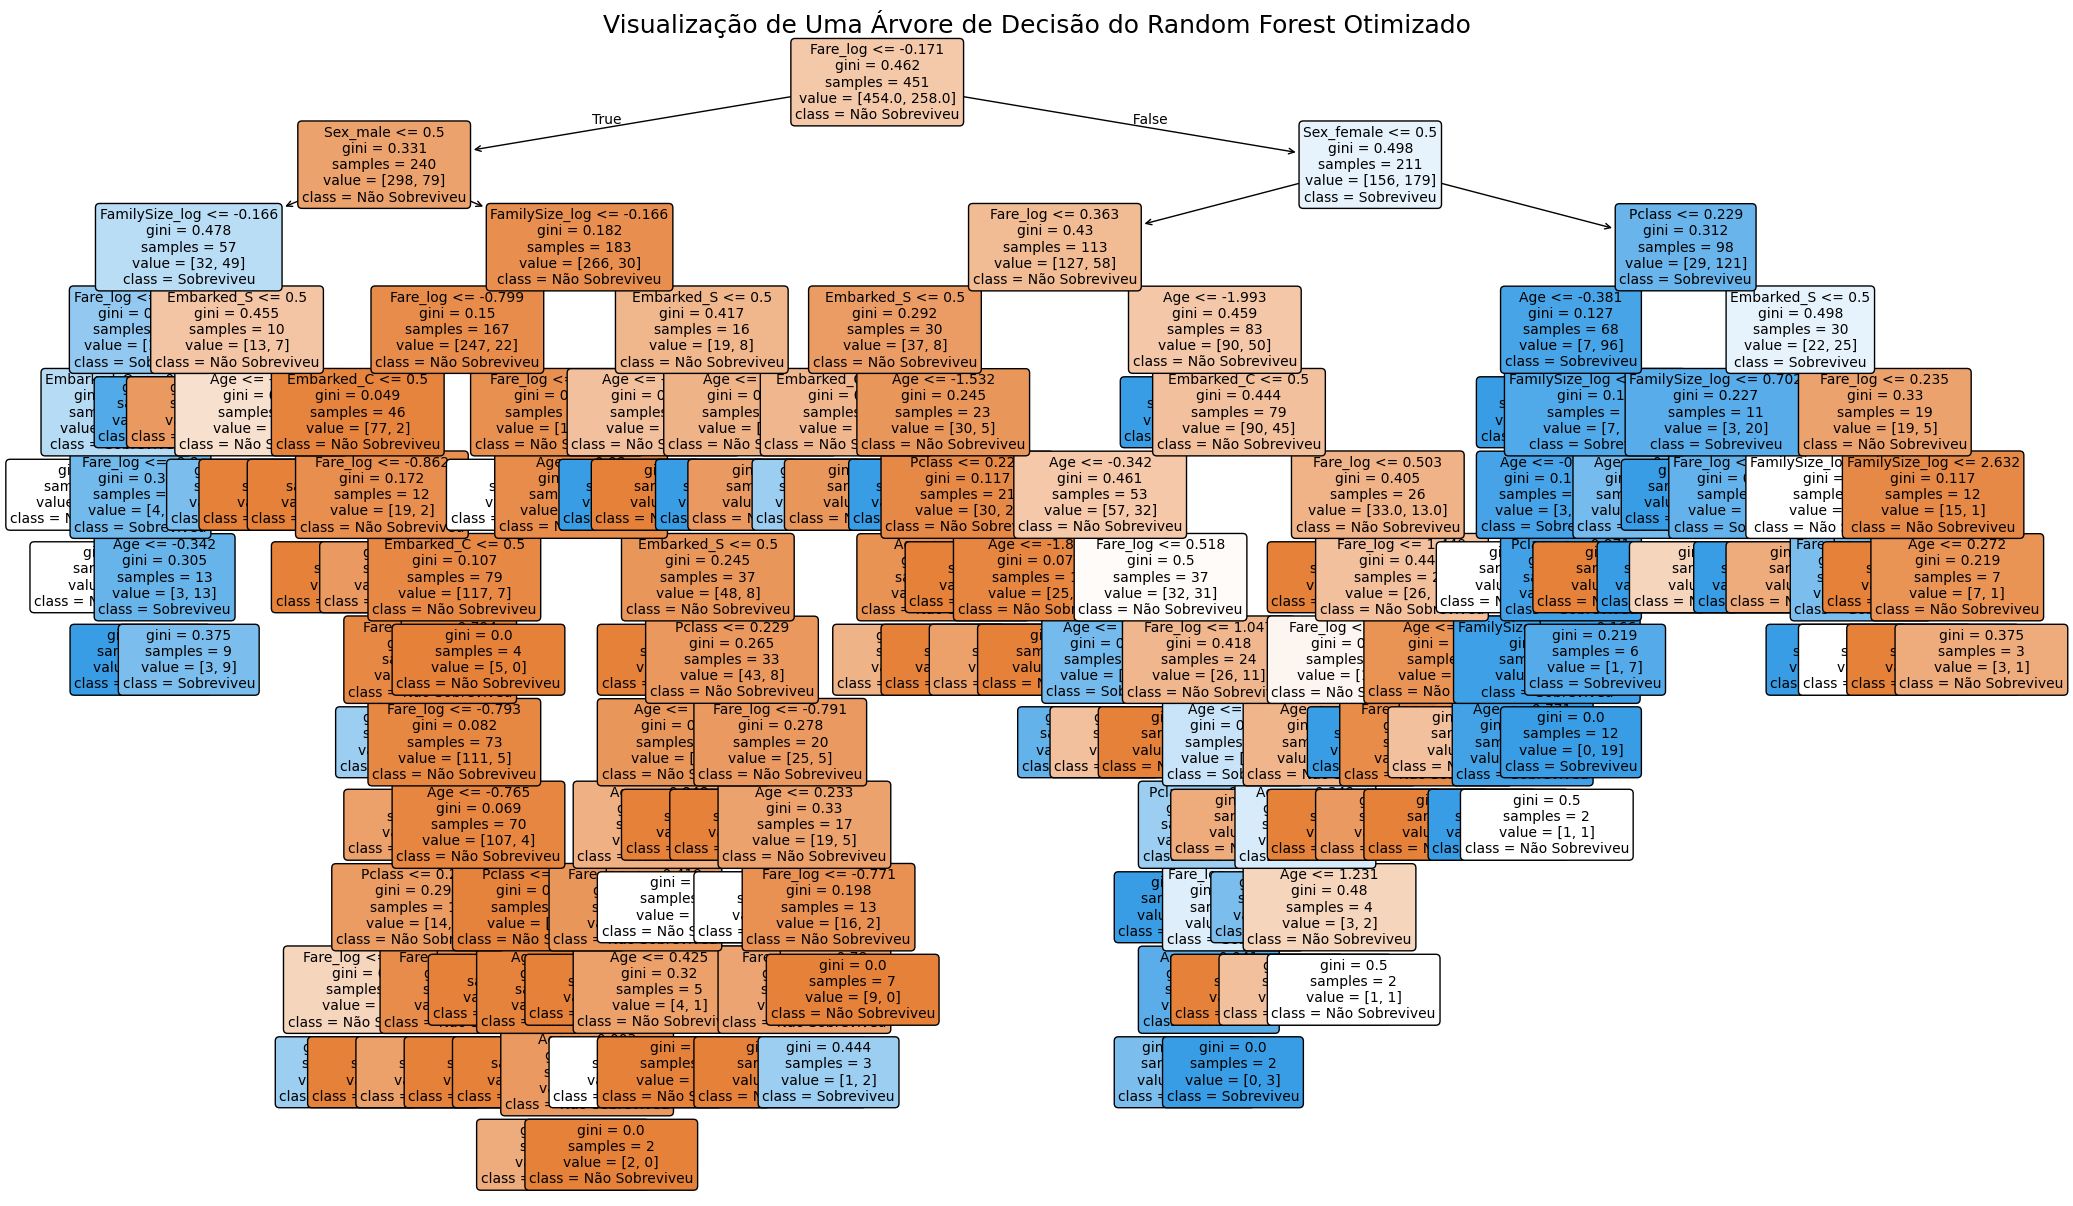


Primeiras 5 linhas de X_train (para referência das colunas):
       Pclass       Age  Fare_log  FamilySize_log  Sex_female  Sex_male  \
692  0.829568 -0.112078  1.124592       -0.673815       False      True   
481 -0.370945 -0.112078 -3.014278       -0.673815       False      True   
527 -1.571457 -0.112078  2.508198       -0.673815       False      True   
855  0.829568 -0.879807 -0.627019        0.342059        True     False   
801 -0.370945  0.118241  0.361872        1.062832        True     False   

     Embarked_C  Embarked_Q  Embarked_S  
692       False       False        True  
481       False       False        True  
527       False       False        True  
855       False       False        True  
801       False       False        True  


In [1363]:
# Plotar uma Árvore de Decisão do Random Forest

plt.figure(figsize=(25, 15)) # Ajuste o tamanho para melhor visualização
plot_tree(best_rf_model.estimators_[0], # Seleciona a primeira árvore da floresta (índice 0)
          feature_names=X_train.columns.tolist(), # Nome das features
          class_names=['Não Sobreviveu', 'Sobreviveu'], # Nomes das classes
          filled=True, # Preencher os nós com cores
          rounded=True, # Cantos arredondados
          fontsize=10) # Tamanho da fonte
plt.title("Visualização de Uma Árvore de Decisão do Random Forest Otimizado", fontsize=18)
plt.show()

print("\nPrimeiras 5 linhas de X_train (para referência das colunas):")
print(X_train.head())

### Machine Learning - Floresta Aleatoria (Random Forest) - Importancia das Features

In [1364]:
# Obter a importância das features do melhor modelo
importancia = best_rf_model.feature_importances_

In [1365]:
# Mapear as importâncias para os nomes das colunas
feature_nomes = X_train.columns
feature_importancia = pd.Series(importancia, index=feature_nomes).sort_values(ascending=False)

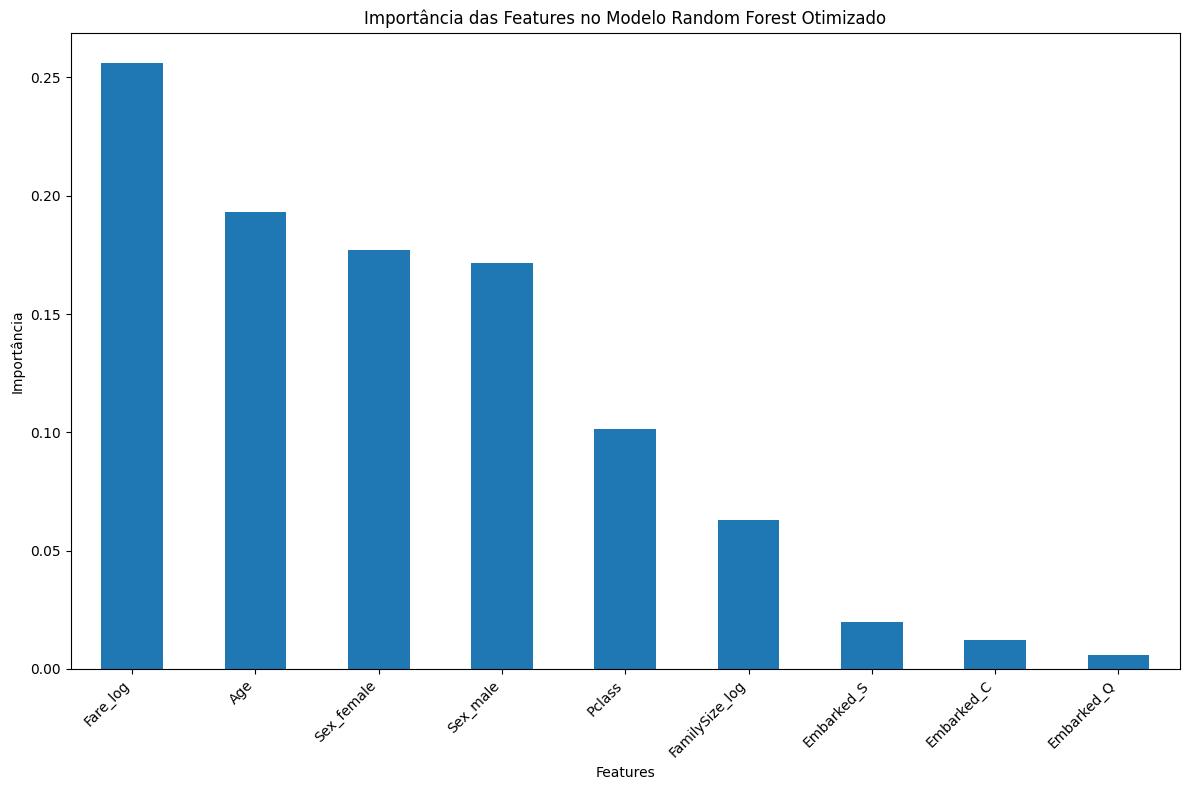


Importância das Features:
Fare_log          0.256061
Age               0.192999
Sex_female        0.177067
Sex_male          0.171768
Pclass            0.101340
FamilySize_log    0.062958
Embarked_S        0.019616
Embarked_C        0.012344
Embarked_Q        0.005847
dtype: float64


In [1366]:
# Plotar a importância das features
plt.figure(figsize=(12, 8))
feature_importancia.plot(kind='bar')
plt.title('Importância das Features no Modelo Random Forest Otimizado')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

print("\nImportância das Features:")
print(feature_importancia)

### Machine Learning - Floresta Aleatoria (Random Forest) - Validacao Cruzada

In [1367]:
# Criar uma cópia de X para escalonar, para não modificar o X original que usaremos
X_scaled_para_vc = X.copy()
X_scaled_para_vc[Colunas_Numericas] = scaler.fit_transform(X_scaled_para_vc[Colunas_Numericas])

In [1368]:
# GridSearchCV será treinado no X_scaled_para_vc e y
grid_search_rf.fit(X_scaled_para_vc, Y) # Treinar GridSearchCV no X completo (X_scaled_para_vc) para obter best_estimator_
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [1369]:
# Realizar Validação Cruzada no melhor modelo
print("\nRealizando validação cruzada no melhor modelo Random Forest...")
cv_scores = cross_val_score(best_rf_model, 
                            X_scaled_para_vc, 
                            Y, 
                            cv=5, # cv=5 significa 5-fold cross-validation
                            scoring='accuracy', # 'scoring' define a métrica de avaliação
                            n_jobs=-1) # n_jobs=-1 para usar todos os núcleos da CPU


Realizando validação cruzada no melhor modelo Random Forest...


In [1370]:
# Imprimir os resultados
print(f"Pontuações de acurácia da validação cruzada: {cv_scores}")
print(f"Acurácia média da validação cruzada: {cv_scores.mean():.4f}")
print(f"Desvio padrão da acurácia da validação cruzada: {cv_scores.std():.4f}")

Pontuações de acurácia da validação cruzada: [0.79329609 0.80337079 0.87078652 0.81460674 0.85393258]
Acurácia média da validação cruzada: 0.8272
Desvio padrão da acurácia da validação cruzada: 0.0300


## Machine Learning - XGBoost

### Machine Learning - XGBoost - Treinando

In [1371]:
# Inicializar o modelo XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, # Número de árvores
                              learning_rate=0.1, # Taxa de aprendizado
                              random_state=42, # Para reprodutibilidade
                              use_label_encoder=False, # Para evitar warnings recentes do XGBoost
                              eval_metric='logloss') # Métrica de avaliação

In [1372]:
# Treinar o modelo
print("\nTreinando o modelo XGBoost...")
xgb_model.fit(X_train, Y_train)
print("Modelo XGBoost treinado com sucesso!")


Treinando o modelo XGBoost...
Modelo XGBoost treinado com sucesso!


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:34:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [1373]:
# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

In [1374]:
# Avaliar o modelo
print("\nAvaliação do Modelo XGBoost")

# Acurácia
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
print(f"Acurácia: {accuracy_xgb:.4f}")

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(Y_test, y_pred_xgb))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(Y_test, y_pred_xgb))


Avaliação do Modelo XGBoost
Acurácia: 0.7989

Matriz de Confusão:
[[97 13]
 [23 46]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



### Machine Learning - XGBoost - GridSearchCV

In [1375]:
# Definir a grade de hiperparâmetros para XGBoost
#param_grid_xgb = {
#    'n_estimators': [100, 200, 300], # Número de árvores
#    'learning_rate': [0.01, 0.05, 0.1], # Taxa de aprendizado
#    'max_depth': [3, 5, 7], # Profundidade máxima de cada árvore
#    'subsample': [0.7, 0.9], # Pode adicionar mais aqui se quiser explorar
#    'colsample_bytree': [0.7, 0.9], # Pode adicionar mais aqui
#    'gamma': [0, 0.1, 0.2], # Regularização
#    'random_state': [42] # Para reprodutibilidade
#}

param_grid_xgb = {
    'colsample_bytree': [0.7], 
    'gamma': [0], 
    'learning_rate': [0.01], 
    'max_depth': [3], 
    'n_estimators': [100], 
    'random_state': [42], 
    'subsample': [0.9]
    }

In [1376]:
# Inicializar o modelo base XGBoost
xgb_base = xgb.XGBClassifier(use_label_encoder=False, # Para evitar warnings recentes do XGBoost, 
                             eval_metric='logloss' # Definindo a métrica de avaliação
                             )

In [1377]:
# Configurar o GridSearchCV para XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_base, 
                               param_grid=param_grid_xgb,
                               cv=5, # Validação cruzada com 5 folds
                               scoring='accuracy', # Métrica de avaliação
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1 # Exibir progresso
                               )

In [1378]:
# Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do XGBoost...")
grid_search_xgb.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Busca em grade concluída!


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:34:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [1379]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para XGBoost:", grid_search_xgb.best_params_)
print(f"Melhor acurácia da validação cruzada para XGBoost: {grid_search_xgb.best_score_:.4f}")


Melhores hiperparâmetros encontrados para XGBoost: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.9}
Melhor acurácia da validação cruzada para XGBoost: 0.8203


In [1380]:
# Obter o melhor modelo treinado
best_xgb_model = grid_search_xgb.best_estimator_

In [1381]:
# Avaliar o melhor modelo XGBoost no conjunto de TESTE
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo XGBoost (Otimizado) no Conjunto de TESTE ---")
accuracy_xgb_tuned = accuracy_score(Y_test, y_pred_xgb_tuned)
print(f"Acurácia (XGBoost otimizado): {accuracy_xgb_tuned:.4f}")
print("\nMatriz de Confusão (XGBoost otimizado):")
print(confusion_matrix(Y_test, y_pred_xgb_tuned))
print("\nRelatório de Classificação (XGBoost otimizado):")
print(classification_report(Y_test, y_pred_xgb_tuned))


--- Avaliação do Melhor Modelo XGBoost (Otimizado) no Conjunto de TESTE ---
Acurácia (XGBoost otimizado): 0.7933

Matriz de Confusão (XGBoost otimizado):
[[104   6]
 [ 31  38]]

Relatório de Classificação (XGBoost otimizado):
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       110
           1       0.86      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.82      0.75      0.76       179
weighted avg       0.81      0.79      0.78       179



## Machine Learning - K-nn

### Machine Learning - K-nn - Treinamento

In [1382]:
# Inicializar o modelo KNN
knn_model = KNeighborsClassifier(
    n_neighbors=5 # Número de vizinhos a serem considerados
)

In [1383]:
# Treinar o modelo
print("\nTreinando o modelo KNN...")
knn_model.fit(X_train, Y_train)
print("Modelo KNN treinado com sucesso!")


Treinando o modelo KNN...
Modelo KNN treinado com sucesso!


In [1384]:
# Fazer previsões no conjunto de teste
Y_pred_knn = knn_model.predict(X_test)

In [1385]:
# 5. Avaliar o modelo
print("\nAvaliação do Modelo KNN ")

# Acurácia
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"Acurácia: {accuracy_knn:.4f}")

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred_knn))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred_knn))


Avaliação do Modelo KNN 
Acurácia: 0.7877

Matriz de Confusão:
[[93 17]
 [21 48]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



### Machine Learning - K-nn - GridSearchCV

In [1386]:
# Definir a grade de hiperparâmetros para K-nn
#param_grid_knn = {
#    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], # Valores comuns para K
#    'weights': ['uniform', 'distance'], # Uniform: todos vizinhos contam igual; Distance: vizinhos mais próximos contam mais
#    'metric': ['euclidean', 'manhattan'] # Funções de distância
#}

# Melhor conjunto de parâmetros para o GridSearchCV para K-nn
param_grid_knn = {'metric': ['manhattan'], 
                  'n_neighbors': [15], 
                  'weights': ['uniform']
                  }


In [1387]:
# Inicializar o modelo base KNN
knn_base = KNeighborsClassifier()

In [1388]:
# Configurar o GridSearchCV para KNN
grid_search_knn = GridSearchCV(estimator=knn_base, 
                               param_grid=param_grid_knn,
                               cv=5, # Validação cruzada com 5 folds
                               scoring='accuracy', # Métrica de avaliação
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1 # Exibir progresso
                               )

In [1389]:
# Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do KNN...")
grid_search_knn.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do KNN...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Busca em grade concluída!


In [1390]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para KNN:", grid_search_knn.best_params_)
print(f"Melhor acurácia da validação cruzada para KNN: {grid_search_knn.best_score_:.4f}")


Melhores hiperparâmetros encontrados para KNN: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Melhor acurácia da validação cruzada para KNN: 0.8259


In [1391]:
# Obter o melhor modelo treinado
best_knn_model = grid_search_knn.best_estimator_

In [1392]:
# Avaliar o melhor modelo KNN no conjunto de TESTE
y_pred_knn_tuned = best_knn_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo KNN (Otimizado) no Conjunto de TESTE ---")
accuracy_knn_tuned = accuracy_score(Y_test, y_pred_knn_tuned)
print(f"Acurácia (KNN otimizado): {accuracy_knn_tuned:.4f}")
print("\nMatriz de Confusão (KNN otimizado):")
print(confusion_matrix(Y_test, y_pred_knn_tuned))
print("\nRelatório de Classificação (KNN otimizado):")
print(classification_report(Y_test, y_pred_knn_tuned))


--- Avaliação do Melhor Modelo KNN (Otimizado) no Conjunto de TESTE ---
Acurácia (KNN otimizado): 0.8156

Matriz de Confusão (KNN otimizado):
[[101   9]
 [ 24  45]]

Relatório de Classificação (KNN otimizado):
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



### Machine Learning - K-nn - Validacao Cruzada

In [1393]:
# GridSearchCV será treinado no X_scaled_para_vc e Y
grid_search_rf.fit(X_scaled_para_vc, Y) # Treinar GridSearchCV no X completo (X_scaled_para_vc) para obter best_estimator_
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [1394]:
# Executar a validação cruzada
print("\nRealizando validação cruzada no melhor modelo KNN...")
cv_scores_knn = cross_val_score(best_knn_model, 
                                X_scaled_para_vc, 
                                Y, 
                                cv=5, # cv=5 significa 5-fold cross-validation
                                scoring='accuracy', # 'scoring' define a métrica de avaliação
                                n_jobs=-1 # n_jobs=-1 para usar todos os núcleos da CPU
                                )


Realizando validação cruzada no melhor modelo KNN...


In [1395]:
# 3. Imprimir os resultados
print(f"Pontuações de acurácia da validação cruzada para KNN: {cv_scores_knn}")
print(f"Acurácia média da validação cruzada para KNN: {cv_scores_knn.mean():.4f}")
print(f"Desvio padrão da acurácia da validação cruzada para KNN: {cv_scores_knn.std():.4f}")

Pontuações de acurácia da validação cruzada para KNN: [0.81005587 0.78089888 0.82022472 0.79775281 0.84269663]
Acurácia média da validação cruzada para KNN: 0.8103
Desvio padrão da acurácia da validação cruzada para KNN: 0.0208


## Machine Learning - SVM 

### Machine Learning - SVM - Treinamento

In [1396]:
# Inicializar o modelo SVM
svm_model = SVC(kernel='rbf', # Kernel radial basis function (RBF)
                C=1.0, # Parâmetro de regularização
                gamma='scale', # Parâmetro de escala para o kernel RBF 
                random_state=42, # Para reprodutibilidade
                probability=True # Habilitar a previsão de probabilidades
                )

In [1397]:
# 3. Treinar o modelo
print("\nTreinando o modelo SVM...")
svm_model.fit(X_train, Y_train)
print("Modelo SVM treinado com sucesso!")


Treinando o modelo SVM...
Modelo SVM treinado com sucesso!


In [1398]:
# 4. Fazer previsões no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

In [1399]:
# 5. Avaliar o modelo
print("\n--- Avaliação do Modelo SVM ---")

# Acurácia
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
print(f"Acurácia: {accuracy_svm:.4f}")

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(Y_test, y_pred_svm))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(Y_test, y_pred_svm))


--- Avaliação do Modelo SVM ---
Acurácia: 0.8045

Matriz de Confusão:
[[101   9]
 [ 26  43]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       110
           1       0.83      0.62      0.71        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



### Machine Learning - SVM - GridSearchCV

In [1400]:
# Definir a grade de hiperparâmetros para SVM
#param_grid_svm = {
#    'C': [0.1, 1, 10, 100], # Parâmetro de regularização (menor C = mais regularização)
#    'gamma': [0.001, 0.01, 0.1, 1], # Parâmetro do kernel (impacta a forma da fronteira de decisão)
#    'kernel': ['rbf'] # O kernel RBF é um bom ponto de partida, mas você pode testar outros como 'linear', 'poly'
#}

# Melhor conjunto de parâmetros para o GridSearchCV para SVM
param_grid_svm = {'C': 100, # Parâmetro de regularização
                  'gamma': 0.01, # Parâmetro do kernel (impacta a forma da fronteira de #decisão)
                  'kernel': 'rbf' # O kernel RBF é um bom ponto de partida
                  }


In [1401]:
# Inicializar o modelo base SVM
svm_base = SVC(random_state=42,
              probability=True, # Habilitar a previsão de probabilidades
              )

In [1402]:
# Configurar o GridSearchCV para SVM
grid_search_svm = GridSearchCV(estimator=svm_base, 
                               param_grid=param_grid_svm,
                               cv=5, # Validação cruzada com 5 folds
                               scoring='accuracy', # Otimizar pela acurácia
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1) # verbose=1 para ver o progresso

In [1403]:
# 5. Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do SVM...")
grid_search_svm.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do SVM...


TypeError: Parameter grid for parameter 'C' needs to be a list or a numpy array, but got 100 (of type int) instead. Single values need to be wrapped in a list with one element.

In [ ]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para SVM:", grid_search_svm.best_params_)
print(f"Melhor acurácia da validação cruzada para SVM: {grid_search_svm.best_score_:.4f}")


Melhores hiperparâmetros encontrados para SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Melhor acurácia da validação cruzada para SVM: 0.8259


In [ ]:
# Obter o melhor modelo treinado
best_svm_model = grid_search_svm.best_estimator_

In [ ]:
# Avaliar o melhor modelo SVM no conjunto de TESTE
y_pred_svm_tuned = best_svm_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo SVM (Otimizado) no Conjunto de TESTE ---")
accuracy_svm_tuned = accuracy_score(Y_test, y_pred_svm_tuned)
print(f"Acurácia (SVM otimizado): {accuracy_svm_tuned:.4f}")
print("\nMatriz de Confusão (SVM otimizado):")
print(confusion_matrix(Y_test, y_pred_svm_tuned))
print("\nRelatório de Classificação (SVM otimizado):")
print(classification_report(Y_test, y_pred_svm_tuned))


--- Avaliação do Melhor Modelo SVM (Otimizado) no Conjunto de TESTE ---
Acurácia (SVM otimizado): 0.8212

Matriz de Confusão (SVM otimizado):
[[101   9]
 [ 23  46]]

Relatório de Classificação (SVM otimizado):
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



## Machine Learning - Voting Classifier

### Machine Learning - Voting Classifier - Treinamento

In [ ]:
# Definir os estimadores para o Voting Classifier
# Damos um nome ('rf', 'svm', 'knn') e o objeto do modelo
estimators = [
    ('rf', best_rf_model), # Usando o Random Forest otimizado
    ('svm', best_svm_model), # Usando o SVM com probability=True
    ('knn', best_knn_model) # Usando o KNN otimizado
]

In [ ]:
# Inicializar o Voting Classifier
voting_clf = VotingClassifier(estimators=estimators, # Lista de estimadores
                              voting='soft', # Votação suave (baseada em probabilidades)
                              weights=[1, 1, 1], # Pesos iguais para todos os modelos (pode ser ajustado)
                              n_jobs=-1 # Usar todos os núcleos disponíveis para paralelização
                              )


In [ ]:
# Treinar o Voting Classifier
print("\nTreinando o Voting Classifier...")
voting_clf.fit(X_train, Y_train)
print("Voting Classifier treinado com sucesso!")


Treinando o Voting Classifier...
Voting Classifier treinado com sucesso!


In [ ]:
# Fazer previsões no conjunto de teste
y_pred_ensemble = voting_clf.predict(X_test)

In [ ]:
# 6. Avaliar o Voting Classifier
print("\nvaliação do Voting Classifier")

accuracy_ensemble = accuracy_score(Y_test, y_pred_ensemble)
print(f"Acurácia: {accuracy_ensemble:.4f}")

print("\nMatriz de Confusão:")
print(confusion_matrix(Y_test, y_pred_ensemble))

print("\nRelatório de Classificação:")
print(classification_report(Y_test, y_pred_ensemble))


valiação do Voting Classifier
Acurácia: 0.8324

Matriz de Confusão:
[[104   6]
 [ 24  45]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       110
           1       0.88      0.65      0.75        69

    accuracy                           0.83       179
   macro avg       0.85      0.80      0.81       179
weighted avg       0.84      0.83      0.83       179



### Machine Learning - Voting Classifier - Validacao Cruzada

In [ ]:
# Realizar Validação Cruzada no Voting Classifier
print("\nRealizando validação cruzada no Voting Classifier...")
# cross_val_score para o VotingClassifier
cv_scores_voting = cross_val_score(voting_clf, X_scaled_para_vc, Y, cv=5, scoring='accuracy', n_jobs=-1)


Realizando validação cruzada no Voting Classifier...


In [ ]:
# Imprimir os resultados
print(f"Pontuações de acurácia da validação cruzada para o Voting Classifier: {cv_scores_voting}")
print(f"Acurácia média da validação cruzada para o Voting Classifier: {cv_scores_voting.mean():.4f}")
print(f"Desvio padrão da acurácia da validação cruzada para o Voting Classifier: {cv_scores_voting.std():.4f}")

Pontuações de acurácia da validação cruzada para o Voting Classifier: [0.84357542 0.79775281 0.81460674 0.79213483 0.84269663]
Acurácia média da validação cruzada para o Voting Classifier: 0.8182
Desvio padrão da acurácia da validação cruzada para o Voting Classifier: 0.0217


# Processamento do arquivo test e Geração da Submissão

## Dataset test

In [1470]:
# Carregar o arquivo test.csv
df_test = pd.read_csv(r'C:\Python\Titanic\test.csv')

In [1471]:
# Guardar PassengerId para o arquivo de submissão
passenger_ids = df_test['PassengerId']

## Tratamento de dados

In [1472]:
df_train_encoded.head()

,Survived,Pclass,Age,Fare_log,FamilySize_log,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,2.110213,1.098612,False,True,False,False,True
1,1,1,38.0,4.280593,1.098612,True,False,True,False,False
2,1,3,26.0,2.188856,0.693147,True,False,False,False,True
3,1,1,35.0,3.990834,1.098612,True,False,False,False,True
4,0,3,35.0,2.202765,0.693147,False,True,False,False,True


In [1473]:
# Excluir a Coluna 'Cabin'
df_test = df_test.drop('Cabin', axis=1)

# Excluir a Coluna 'Name'
df_test = df_test.drop('Name', axis=1)

# Excluir a Coluna 'Ticket'
df_test = df_test.drop('Ticket', axis=1)

# Excluir a Coluna 'PassengerId' (não é uma feature, apenas um identificador)
df_test = df_test.drop('PassengerId', axis=1)

# Tratamento da Coluna 'Embarked' (usar a moda do treino)
df_test['Embarked'].fillna(moda_embarked, inplace=True)

# Tratamento da Coluna 'Age' (usar a mediana do treino)
df_test['Age'].fillna(mediana_idade, inplace=True)

# Tratamento da Coluna 'Fare' (usar a mediana do treino)
df_test['Fare'].fillna(mediana_fare, inplace=True)

# Transformação da Coluna 'Fare_log'
df_test['Fare_log'] = np.log1p(df_test['Fare'])

# Criação da coluna 'FamilySize'
df_test['SibSp'].fillna(0, inplace=True)
df_test['Parch'].fillna(0, inplace=True)
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

# Transformação da Coluna 'FamilySize_log'
df_test['FamilySize_log'] = np.log1p(df_test['FamilySize'])

# One-Hot Encoding da coluna 'Sex'
df_test = pd.get_dummies(df_test, columns=['Sex'], drop_first=False)

# One-Hot Encoding da coluna 'Embarked'
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=False)

# Excluir a coluna 'SibSp'
df_test.drop('SibSp', axis=1, inplace=True)

# Excluir a coluna 'Parch'
df_test.drop('Parch', axis=1, inplace=True)

# Excluir a coluna 'Fare'
df_test.drop('Fare', axis=1, inplace=True)

# Excluir a coluna 'FamilySize'
df_test.drop('FamilySize', axis=1, inplace=True)

C:\Users\NVME\AppData\Local\Temp\ipykernel_8948\2307944412.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Embarked'].fillna(moda_embarked, inplace=True)
C:\Users\NVME\AppData\Local\Temp\ipykernel_8948\2307944412.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [1474]:
# Exibir as 5 primeiras linhas do dataset
print(df_test.head())

   Pclass   Age  Fare_log  FamilySize_log  Sex_female  Sex_male  Embarked_C  \
0       3  34.5  2.178064        0.693147       False      True       False   
1       3  47.0  2.079442        1.098612        True     False       False   
2       2  62.0  2.369075        0.693147       False      True       False   
3       3  27.0  2.268252        0.693147       False      True       False   
4       3  22.0  2.586824        1.386294        True     False       False   

   Embarked_Q  Embarked_S  
0        True       False  
1       False        True  
2        True       False  
3       False        True  
4       False        True  


In [1475]:
# Exibir informações gerais sobre o DataFrame
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   Fare_log        418 non-null    float64
 3   FamilySize_log  418 non-null    float64
 4   Sex_female      418 non-null    bool   
 5   Sex_male        418 non-null    bool   
 6   Embarked_C      418 non-null    bool   
 7   Embarked_Q      418 non-null    bool   
 8   Embarked_S      418 non-null    bool   
dtypes: bool(5), float64(3), int64(1)
memory usage: 15.2 KB
None


In [1476]:
# Contar valores ausentes por coluna
print(df_test.isnull().sum())

Pclass            0
Age               0
Fare_log          0
FamilySize_log    0
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
dtype: int64


In [1477]:
# Fazer previsões no df_test processado usando o melhor modelo
predictions = best_rf_model.predict(df_test)

In [1478]:
# Criar o arquivo de submissão
submission_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})

In [1479]:
# Salvar o arquivo de submissão em CSV
submission_df.to_csv('submission_titanic_rf_otimizado.csv', index=False)

print("\nArquivo de submissão gerado com sucesso: submission_titanic_rf_otimizado.csv")
print("Primeiras 5 linhas do arquivo de submissão:")
print(submission_df.head())


Arquivo de submissão gerado com sucesso: submission_titanic_rf_otimizado.csv
Primeiras 5 linhas do arquivo de submissão:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
